In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib
import matplotlib.pyplot as plt
matplotlib.matplotlib_fname()
%matplotlib inline

import statsmodels.formula.api as smf

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(700, 2)

In [4]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
max(train.x)

3530.15736917

In [6]:
train.sort_values(by=['x']).tail()

,x,y
676,100.000000,100.701274
269,100.000000,99.003618
158,100.000000,96.623279
632,100.000000,108.871618
213,3530.157369,NaN


In [7]:
# remove outlier
train = train[train['x'] <= 100]
train.sort_values(by=['x']).tail()

,x,y
676,100.0,100.701274
269,100.0,99.003618
158,100.0,96.623279
685,100.0,95.584595
298,100.0,99.984916


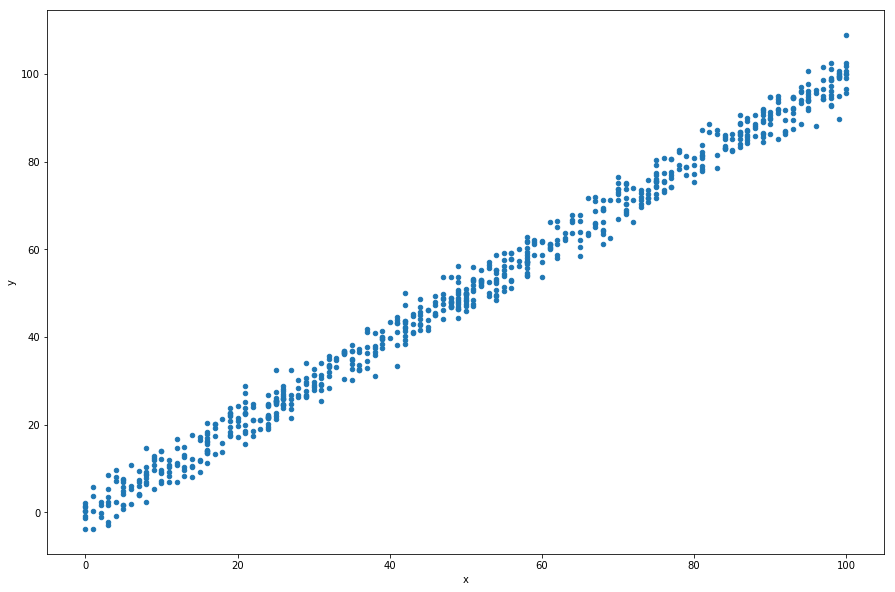

In [8]:
train.plot(kind='scatter', x='x', y='y', figsize=(15, 10))

$y = \beta_0 + \beta_1 x$

In [9]:
# Coefficients
lm = smf.ols(formula='y ~ x', data=train).fit()
lm.params

Intercept   -0.107265
x            1.000656
dtype: float64

$\beta_0 = intercept = -0.107$

$\beta_1 = slope = \triangle x / \triangle y = 1.001$

In [10]:
# make a prediction
prediction = pd.DataFrame({'x': [50]})
lm.predict(prediction)

0    49.925554
dtype: float64

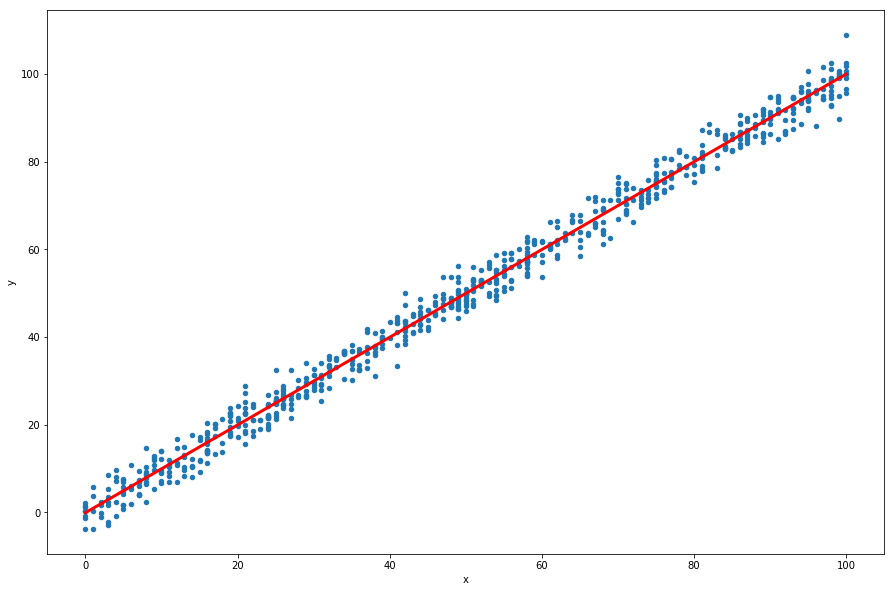

In [11]:
# plot least squares line
x_new = pd.DataFrame({'x': [train.x.min(), train.x.max()]})
preds = lm.predict(x_new)

train.plot(kind='scatter', x='x', y='y', figsize=(15,10))
plt.plot(x_new, preds, c='red', linewidth=3)

In [12]:
# Confidence Intervals
lm.conf_int()

,0,1
Intercept,-0.523835,0.309304
x,0.993447,1.007866


In [13]:
# p values
lm.pvalues

Intercept    0.613324
x            0.000000
dtype: float64

In [14]:
# r squared
lm.rsquared

0.99070153190255184

In [15]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [16]:
x_train = train['x']
y_train = train['y']

In [19]:
x_train.shape

(699,)

In [20]:
y_train.shape

(699,)

In [17]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

/Users/sam/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 699]